# Possum Regression

## Подключение модулей

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Загрузка данных

In [2]:
df = pd.read_csv("datasets/Possum Regression.csv", index_col="case")

In [3]:
df.head()

,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
case,,,,,,,,,,,,,
1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


Описание признаков:
- case - номер наблюдения
- site - номер места, где был пойман поссум
- pop - Популяция, как Vic (Виктория), так и ohter (Новый Южный Уэльс или Квинсленд).
- sex - пол, либо m (мужской), либо f (женский)
- age - возраст поссума
- hdlngth - длина головы, в мм
- skullw - ширина черепа, в мм
- totlngth - общая длина, в см
- taill - длина хвоста, в см
- footlgth - длина ноги
- earconch - длина ушной раковины
- eye - расстояние от медиального канта до латерального канта правого глаза
- chest - окружность груди (в см)
- belly - окружность живота (в см)

## Разведочный анализ данных

In [4]:
df.shape

(104, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104 entries, 1 to 104
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   site      104 non-null    int64  
 1   Pop       104 non-null    object 
 2   sex       104 non-null    object 
 3   age       102 non-null    float64
 4   hdlngth   104 non-null    float64
 5   skullw    104 non-null    float64
 6   totlngth  104 non-null    float64
 7   taill     104 non-null    float64
 8   footlgth  103 non-null    float64
 9   earconch  104 non-null    float64
 10  eye       104 non-null    float64
 11  chest     104 non-null    float64
 12  belly     104 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 11.4+ KB


Имеется 3 пропущенных значения

In [6]:
df.isna().sum()

site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.duplicated().sum()

0

Дубликатов в наборе данных нет

In [9]:
df["Pop"].unique()

array(['Vic', 'other'], dtype=object)

Закодируем пол и место обитания
- Pop: Vic - 0, other - 1
- sex f - 0, m - 1

In [10]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df['Pop'] = labelencoder.fit_transform(df['Pop'])
df['sex'] = labelencoder.fit_transform(df['sex'])
df.sample(2)

,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
case,,,,,,,,,,,,,
39,2,0,0,1.0,84.7,51.5,75.0,34.0,68.7,53.4,13.0,25.0,25.0
82,6,1,0,4.0,86.0,54.0,82.0,36.5,60.7,42.9,15.4,26.0,32.0


In [11]:
df["age"].sample(5)

case
54    7.0
85    3.0
62    3.0
52    6.0
82    4.0
Name: age, dtype: float64

Тип данных age - float, однако, все значения целые. Конвертируем в int

In [12]:
df["age"] = df["age"].astype("int")

site имеет тип int64, конвертируем в int32

In [13]:
df["site"] = df["site"].astype("int")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101 entries, 1 to 104
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   site      101 non-null    int32  
 1   Pop       101 non-null    int32  
 2   sex       101 non-null    int32  
 3   age       101 non-null    int32  
 4   hdlngth   101 non-null    float64
 5   skullw    101 non-null    float64
 6   totlngth  101 non-null    float64
 7   taill     101 non-null    float64
 8   footlgth  101 non-null    float64
 9   earconch  101 non-null    float64
 10  eye       101 non-null    float64
 11  chest     101 non-null    float64
 12  belly     101 non-null    float64
dtypes: float64(9), int32(4)
memory usage: 9.5 KB


## Двумерный анализ признаков

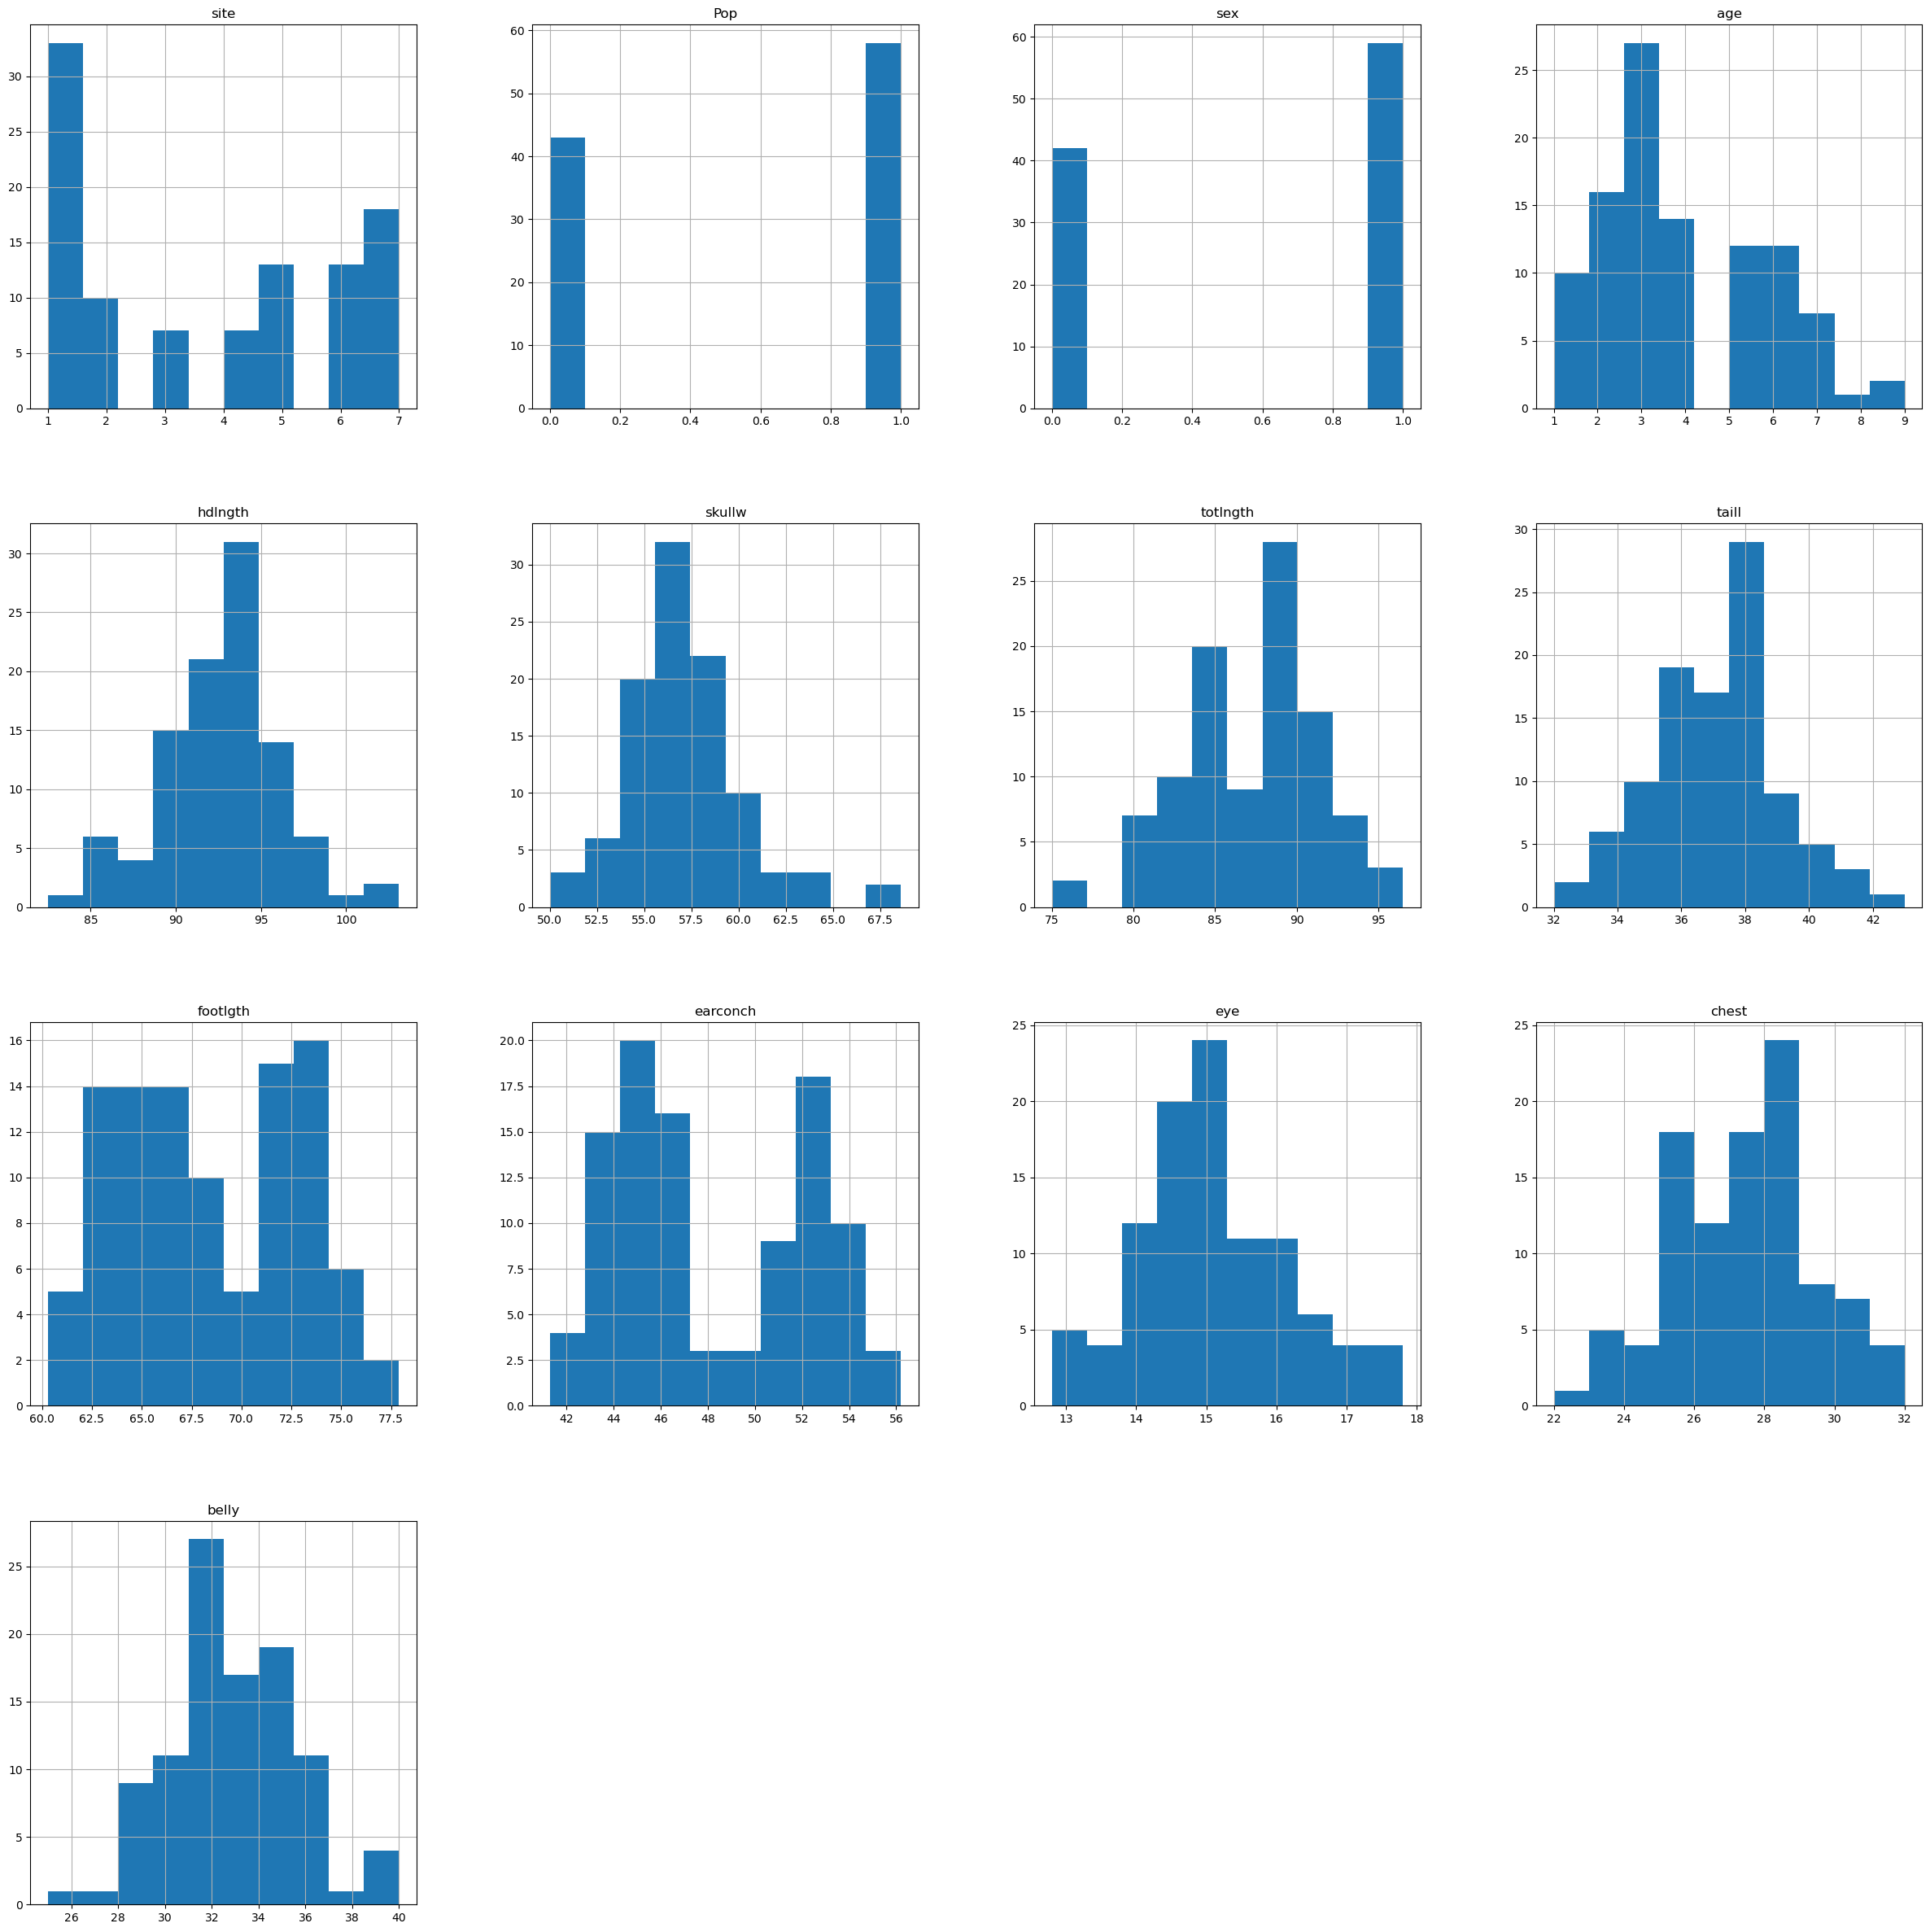

In [15]:
df.hist(figsize=(30, 30));

Распределение только в половине случаев является равномерным

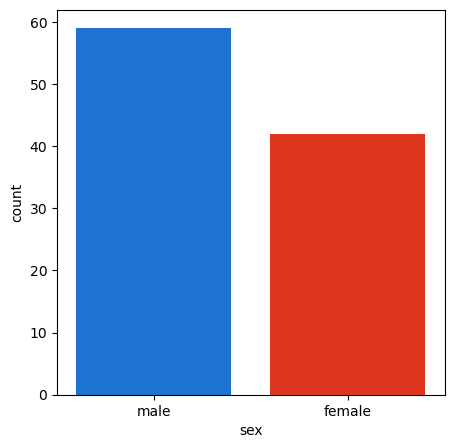

In [16]:
plt.figure(figsize=(5, 5))
sns.countplot(x=df["sex"].replace({0: "female", 1: "male"}), palette=["#0070f0", "#ff1e00"])
plt.show()

Посcумов мужского пола больше чем женского

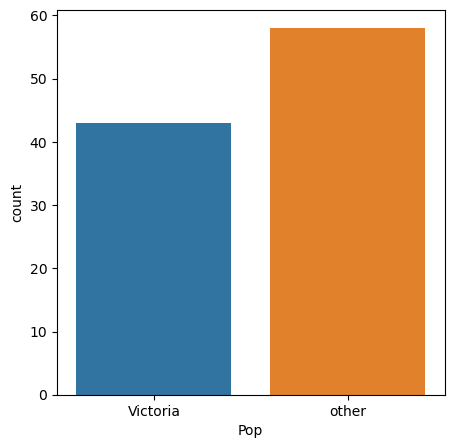

In [17]:
plt.figure(figsize=(5, 5))
sns.countplot(x=df["Pop"].replace({0: "Victoria", 1: "other"}))
plt.show()

Популяция поcсумов в штате Виктория меньше, чем в остальных местностях

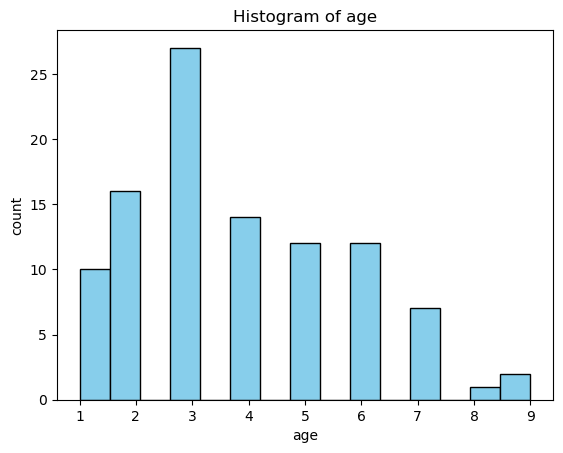

In [18]:
plt.hist(df['age'], bins=15, color='skyblue', edgecolor='black')
plt.xlabel('age')
plt.ylabel('count')
plt.title('Histogram of age')
plt.show()

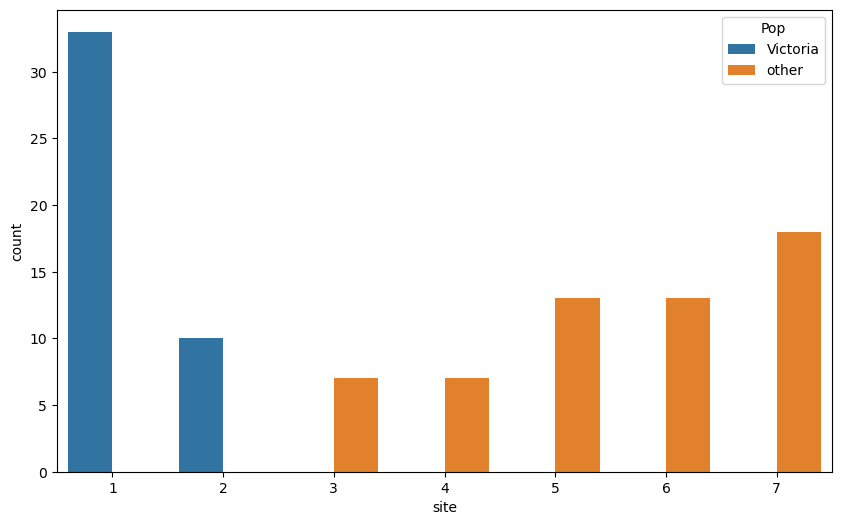

In [19]:
plt.figure(figsize=(10,6))
df2 = df.copy()
df2["Pop"] = df2["Pop"].replace({0: "Victoria", 1: "other"})
sns.countplot(x="site", hue="Pop", data=df2)
plt.show()

График показывает что в первые два места для поимки были в штате Виктория, а остальные в других штатах

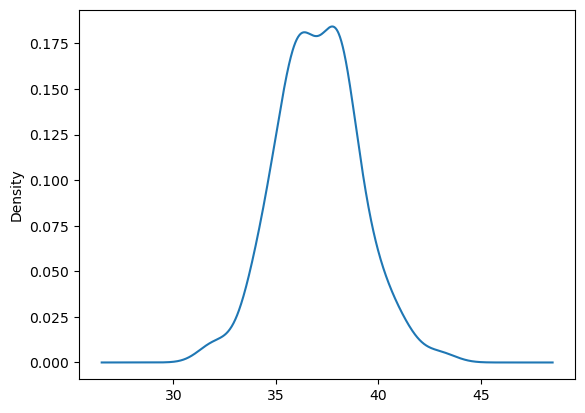

In [20]:
df['taill'].plot.density();

На данном графике видно, что длина хвоста состовляет от примерно от 32 до 45 см

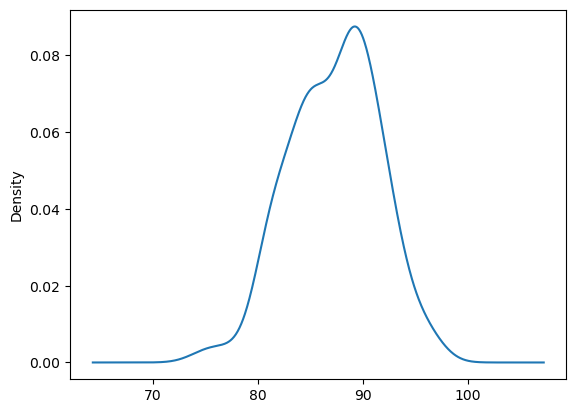

In [21]:
df['totlngth'].plot.density();

Здесь же видно, что общая длина состовляет от примерно от 70 до 100 см

По данным из интернета длина тела поссума составляет 7–50 см, а хвоста — 4–55 см.

В нашем наборе данных, карликовые поссумы не встречаются, так как длина их тела составляет 6–12 см, а хвоста — 6–17 см.

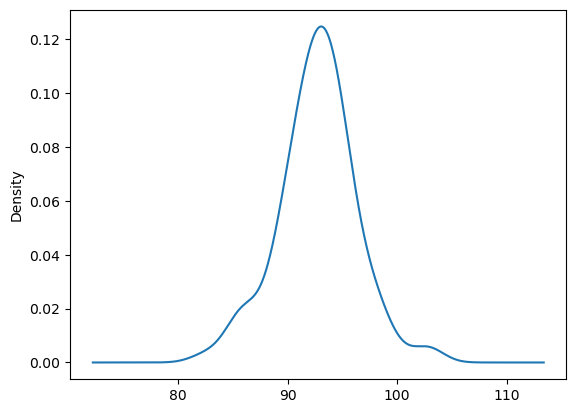

In [22]:
df['hdlngth'].plot.density();

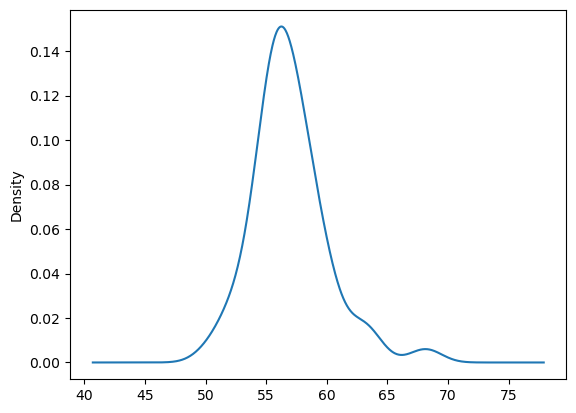

In [23]:
df['skullw'].plot.density();

In [24]:
df = pd.concat([df, pd.get_dummies(df["site"], prefix='site', dtype=int)], axis = 1)
df.drop("site", axis=1, inplace=True)

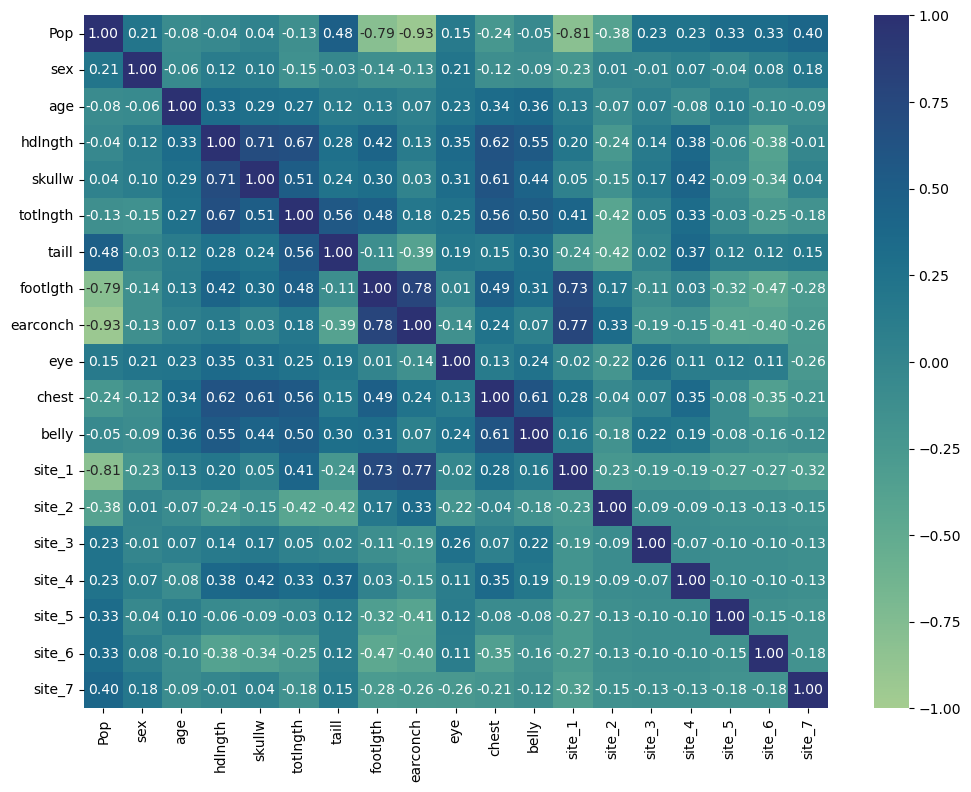

In [25]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(df.corr(), annot=True, ax=ax, cmap="crest", fmt = '0.2f', vmin=-1)
plt.show()

На тепловой карте множество кореляций как положительных так и отрицательных

## Обучение моделей

In [26]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [27]:
Y = df['age']
X = df.drop('age', axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y ,test_size=0.33, random_state=42)

#### LinearRegression

In [28]:
linear_regression = LinearRegression().fit(X_train, Y_train);
linear_regression_test_predict = linear_regression.predict(X_test)

print('mean_Absolute-Error', mean_absolute_error(Y_test, linear_regression_test_predict))
print('mean-squared-error', mean_squared_error(Y_test, linear_regression_test_predict))
print('r2score', r2_score(Y_test, linear_regression_test_predict))

mean_Absolute-Error 1.3649462773046765
mean-squared-error 3.5672315094759934
r2score -0.025545790836669635


In [29]:
weights = linear_regression.coef_
bias = linear_regression.intercept_

print("Веса параметров:", weights)
print("Смещение (bias):", bias)

Веса параметров: [-1.75233667  0.13185271  0.07425708  0.04407645  0.09877568  0.10532138
 -0.31593526 -0.01691538  0.49459713  0.12476788  0.13864812  0.24672771
  1.50560896 -0.54575794 -1.45474846 -0.24808685 -0.13214117  0.62839776]
Смещение (bias): -10.300992545750505


In [30]:
import statsmodels.api as sm

model = sm.OLS(Y_train, sm.add_constant(X_train)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     1.344
Date:                Mon, 02 Dec 2024   Prob (F-statistic):              0.209
Time:                        10:05:30   Log-Likelihood:                -126.99
No. Observations:                  67   AIC:                             288.0
Df Residuals:                      50   BIC:                             325.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.6138      9.271     -0.821      0.4

R-squared равен 0.354, то есть модель объясняет примерно 35,4% изменчивости зависимой переменной (возраста), то есть модель имеет ограниченную предсказательную способность.

OLS Regression Results предупреждают, что подразумевается, следующее:
- Ошибки имеют одинаковую дисперсию для всех наблюдений
- Ошибки не должны быть коррелированы между собой
- Модель правильно определена, и все важные переменные включены, а ненужные — исключены.

Так же OLS Regression Results предупреждают о высоком показателе 

Рассчитаем и выведем OLS Regression Results для hdlngth

In [31]:
Y = df['hdlngth']
X = df.drop('hdlngth', axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y ,test_size=0.33, random_state=42)

model = sm.OLS(Y_train, sm.add_constant(X_train)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                hdlngth   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     7.849
Date:                Mon, 02 Dec 2024   Prob (F-statistic):           8.29e-09
Time:                        10:05:30   Log-Likelihood:                -137.63
No. Observations:                  67   AIC:                             309.3
Df Residuals:                      50   BIC:                             346.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.3579     10.591      1.828      0.0

Создадим метод для обучения моделей и вывода их показателей

In [32]:
def learn_models(target_name, models = None):
    if(models == None):
        models = [
            ("Linear Regression", LinearRegression()),
            ("Decision Tree", DecisionTreeRegressor(random_state=42)),
            ("Random Forest", RandomForestRegressor(random_state=42)),
            ("Gradient Boosting", GradientBoostingRegressor(random_state=42)),
            ("XGBoost", XGBRegressor(random_state=42))
        ]
    
    Y = df[target_name]
    X = df.drop(target_name, axis=1)
    X = X.drop("footlgth", axis=1)
    X = X.drop("chest", axis=1)
    
    #X = X.drop("site_3", axis=1)
    X = X.drop("site_4", axis=1)
    X = X.drop("site_5", axis=1)
    X = X.drop("site_6", axis=1)
    #X = X.drop("site_7", axis=1)

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y ,test_size=0.33, random_state=42)
    
    model = sm.OLS(Y_train, sm.add_constant(X_train)).fit()
    print(model.summary())
    
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    predictions_list = []
    
    for name, model in models:
        model.fit(X_train, Y_train)
        predictions = model.predict(X_test)
        predictions_list.append(predictions)
        
        mae = mean_absolute_error(Y_test, predictions)
        mse = mean_squared_error(Y_test, predictions)
        r2 = r2_score(Y_test, predictions)
        
        r2_scores = cross_val_score(model, X_train, Y_train, cv=kf, scoring='r2')
        mean_r2 = r2_scores.mean()
        
        print(name)
        print(f"  Mean Absolute Error (Test): {mae:.4f}")
        print(f"  Mean Squared Error (Test): {mse:.4f}")
        print(f"  R2 Score (Test): {r2:.4f}")
        print(f"  Mean R2 Score (Cross-Validation): {mean_r2:.4f}")
        print("-" * 50)

    return predictions_list

In [33]:
predictions = learn_models("age")

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     1.070
Date:                Mon, 02 Dec 2024   Prob (F-statistic):              0.403
Time:                        10:05:30   Log-Likelihood:                -131.83
No. Observations:                  67   AIC:                             289.7
Df Residuals:                      54   BIC:                             318.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.2662      7.171     -1.153      0.2

График LinearRegression

In [34]:
Y = df["age"]
X = df.drop("age", axis=1)
X = X.drop("footlgth", axis=1)
X = X.drop("chest", axis=1)

X = X.drop("site_4", axis=1)
X = X.drop("site_5", axis=1)
X = X.drop("site_6", axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y ,test_size=0.33, random_state=42)

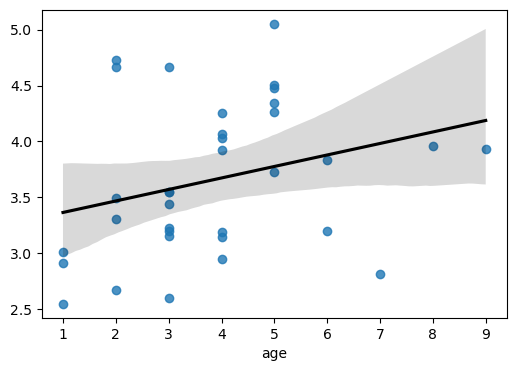

In [35]:
plt.figure(figsize=(6, 4))
sns.regplot(x=Y_test, y=predictions[0], line_kws={"color":"black"});

График Random Forest

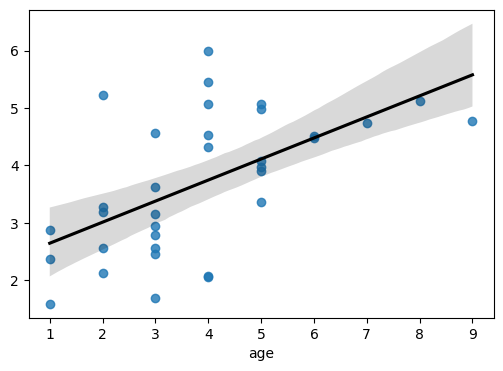

In [36]:
plt.figure(figsize=(6, 4))
sns.regplot(x=Y_test, y=predictions[2], line_kws={"color":"black"});

### Обучим модели для предсказания длины головы

In [37]:
predictions = learn_models("hdlngth")

                            OLS Regression Results                            
Dep. Variable:                hdlngth   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     10.66
Date:                Mon, 02 Dec 2024   Prob (F-statistic):           2.15e-10
Time:                        10:05:32   Log-Likelihood:                -139.02
No. Observations:                  67   AIC:                             304.0
Df Residuals:                      54   BIC:                             332.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.2949      7.810      1.958      0.0

График LinearRegression

In [38]:
Y = df["hdlngth"]
X = df.drop("hdlngth", axis=1)
X = X.drop("footlgth", axis=1)
X = X.drop("chest", axis=1)

X = X.drop("site_4", axis=1)
X = X.drop("site_5", axis=1)
X = X.drop("site_6", axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y ,test_size=0.33, random_state=42)

In [39]:
Y = df['hdlngth']
X = df.drop('hdlngth', axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y ,test_size=0.33, random_state=42)

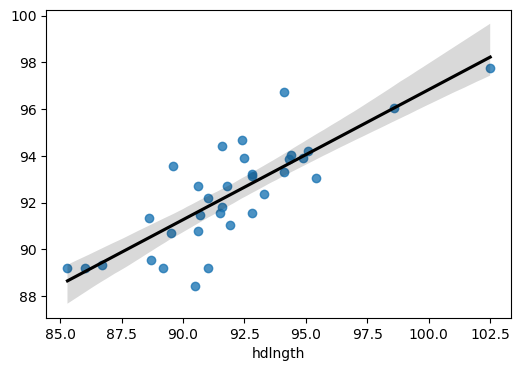

In [40]:
plt.figure(figsize=(6, 4))
sns.regplot(x=Y_test, y=predictions[0], line_kws={"color":"black"});

График Random Forest

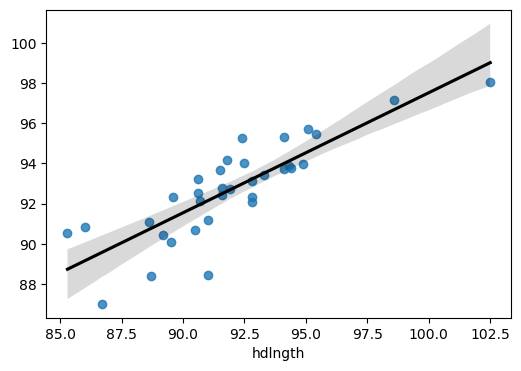

In [41]:
plt.figure(figsize=(6, 4))
sns.regplot(x=Y_test, y=predictions[2], line_kws={"color":"black"});

## Подбор гиперпараметров

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
%%time

rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [5, 9, 10, 11, 20],
    'max_depth': [5, 8, 9, 10, 15, 20],
    'min_samples_split': [3, 4, 5],
    'min_samples_leaf': [0, 1, 2],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, Y_train)

print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучшее значение r2: {grid_search.best_score_:.4f}")

best_rf = grid_search.best_estimator_
test_accuracy = best_rf.score(X_test, Y_test)
print(f"Точность на тестовой выборке: {test_accuracy:.4f}")

Лучшие параметры: {'bootstrap': True, 'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 10}
Лучшее значение r2: 0.5506
Точность на тестовой выборке: 0.6239
CPU times: total: 20.8 s
Wall time: 21 s


In [44]:
learn_models("hdlngth", [
    ("Linear Regression", LinearRegression()),
    ("Decision Tree", DecisionTreeRegressor(random_state=42)),
    ("Random Forest", RandomForestRegressor(
        random_state=42,
        n_estimators=10,
        max_depth=9,
        min_samples_split=4,
        min_samples_leaf=1,
        bootstrap=True)),
    ("Gradient Boosting", GradientBoostingRegressor(random_state=42)),
    ("XGBoost", XGBRegressor(random_state=42))
]);

                            OLS Regression Results                            
Dep. Variable:                hdlngth   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     10.66
Date:                Mon, 02 Dec 2024   Prob (F-statistic):           2.15e-10
Time:                        10:05:54   Log-Likelihood:                -139.02
No. Observations:                  67   AIC:                             304.0
Df Residuals:                      54   BIC:                             332.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.2949      7.810      1.958      0.0

## Используем SMOGN для добавления синтетических данных

SMOGN - это метод, предназначенный для решения проблемы несбалансированных данных. Так же SMOGN добавляет Гауссов шум чтобы избежать строгого совпадения с исходными данными и повысить обобщающую способность.

Однако, не смотря на то, что на сбалансированных данных, зачастую, модели обучаются лучше, у нас есть закодированных категориальный признак, на который можно опираться. Балансировка данных, в теории может снизить точность, так как в нашем наборе данных признаки групируются на 2 группы значений.

Разделим набор данных на 2 части, добавим к одной из частей синтетические данных, обучим на них модель RandomForestRegressor и предскажем результат на второй половине. Таким образом, мы сможем понять, эффективны ли синтетические данные.

In [45]:
import smogn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

data = df.copy()
data = data.dropna()
data = data.reset_index(drop=True)

original_X = data.drop(columns=['hdlngth'])
original_y = data['hdlngth']

X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(
    original_X, original_y, test_size=0.33, random_state=42
)

train_data = X_train_orig.copy()
train_data['hdlngth'] = y_train_orig

train_data = train_data.reset_index(drop=True)
smogn_data = smogn.smoter(train_data, y='hdlngth')

X_resampled = smogn_data.drop(columns=['hdlngth'])
y_resampled = smogn_data['hdlngth']

model = RandomForestRegressor(random_state=42)
model.fit(X_resampled, y_resampled)

y_pred_orig = model.predict(X_test_orig)

mae = mean_absolute_error(y_test_orig, y_pred_orig)
mse = mean_squared_error(y_test_orig, y_pred_orig)
r2 = r2_score(y_test_orig, y_pred_orig)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
r2_scores = cross_val_score(model, X_train_orig, y_train_orig, cv=kf, scoring='r2')
mean_r2 = r2_scores.mean()

print("Размер данных до:", X_train_orig.shape)
print("Размер данных после:", X_resampled.shape)

print()
print(f"Тестирование на исходных данных:\n")
print(f"Mean Absolute Error (Test): {mae:.4f}")
print(f"Mean Squared Error (Test): {mse:.4f}")
print(f"R2 Score (Test): {r2:.4f}")
print(f"Mean R2 Score (Test): {mean_r2:.4f}")

r_index: 100%|##########| 4/4 [00:00<00:00, 497.32it/s]


Размер данных до: (67, 18)
Размер данных после: (71, 18)

Тестирование на исходных данных:

Mean Absolute Error (Test): 1.8289
Mean Squared Error (Test): 4.4850
R2 Score (Test): 0.5867
Mean R2 Score (Test): 0.5631


R2 Score модели оказался ниже предыдущего, можно предположить, что синтетические данные не корректны и/или мешают обучению.
Однако, очитывая колебания показателей, попробуем обучить модели.

In [46]:
df = smogn_data.copy()

In [47]:
predictions = learn_models("hdlngth", [
    ("Linear Regression", LinearRegression()),
    ("Decision Tree", DecisionTreeRegressor(random_state=42)),
    ("Random Forest", RandomForestRegressor(
        random_state=42,
        n_estimators=10,
        max_depth=9,
        min_samples_split=4,
        min_samples_leaf=1,
        bootstrap=True)),
    ("Gradient Boosting", GradientBoostingRegressor(random_state=42)),
    ("XGBoost", XGBRegressor(random_state=42))
])

                            OLS Regression Results                            
Dep. Variable:                hdlngth   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     22.39
Date:                Mon, 02 Dec 2024   Prob (F-statistic):           1.12e-12
Time:                        10:05:56   Log-Likelihood:                -88.564
No. Observations:                  47   AIC:                             205.1
Df Residuals:                      33   BIC:                             231.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.0717     12.743      1.497      0.1

In [48]:
Y = df["hdlngth"]
X = df.drop("hdlngth", axis=1)
X = X.drop("footlgth", axis=1)
X = X.drop("chest", axis=1)

X = X.drop("site_4", axis=1)
X = X.drop("site_5", axis=1)
X = X.drop("site_6", axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y ,test_size=0.33, random_state=42)

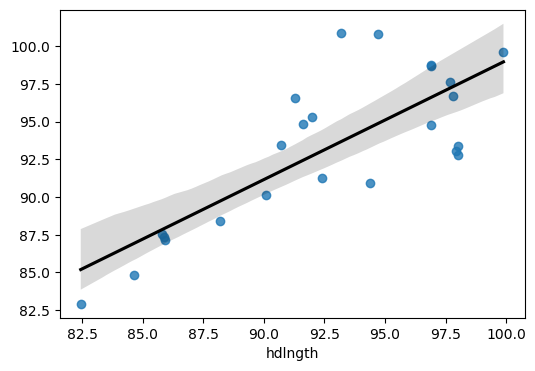

In [49]:
plt.figure(figsize=(6, 4))
sns.regplot(x=Y_test, y=predictions[2], line_kws={"color":"black"});

## Вывод

Популяция опоссумов в других штатах больше чем в штате Виктории. Опоссумов мужского пола больше чем женского.

В набора данных очень мало записей, из за этого точнось модели сильно зависит колеблится и от случая. Связанно это с тем, что признаки практически не влияют на предсказание целевой переменной age. Это можно понять по высоким значениям "P" в OLS Regression Results.
Так же пользы не приносит и мультиколлинеарность, которая возникает из за высокой корреляции признаков

Нормализация, как и стандартизация немного понижают точность лучших моделей (Random Forest и Gradient Boosting), для обучения моделей они не использовались

Добавление нелинейных признакок, взаимодействующих между ключевыми признаками (feature engineering) не принесли результатов. 

Воспользовались синтетическим увеличением данных (SMOGN), 